# Regresja wielomianowa

In [88]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas

%matplotlib inline

In [89]:
# Przydatne funkcje

def cost(theta, X, y):
    """Wersja macierzowa funkcji kosztu"""
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y).T * (X * theta - y))
    return J.item()

def gradient(theta, X, y):
    """Wersja macierzowa gradientu funkcji kosztu"""
    return 1.0 / len(y) * (X.T * (X * theta - y)) 

def gradient_descent(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-7):
    """Algorytm gradientu prostego (wersja macierzowa)"""
    current_cost = fJ(theta, X, y)
    logs = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y)
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if abs(prev_cost - current_cost) > 10**15:
            print('Algorithm does not converge!')
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        logs.append([current_cost, theta]) 
    return theta, logs

def plot_data(X, y, xlabel, ylabel):
    """Wykres danych (wersja macierzowa)"""
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c='r', s=50, label='Dane')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05, .05)
    plt.ylim(y.min() - 1, y.max() + 1)
    plt.xlim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    return fig

def plot_fun(fig, fun, X):
    """Wykres funkcji `fun`"""
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    Arg = np.arange(x0, x1, 0.1)
    Val = fun(Arg)
    return ax.plot(Arg, Val, linewidth='2')

In [90]:
def MSE(Y_true, Y_pred):
    return np.square(np.subtract(Y_true,Y_pred)).mean()

In [91]:
# Funkcja regresji wielomianowej

def h_poly(Theta, x):
    """Funkcja wielomianowa"""
    return sum(theta * np.power(x, i) for i, theta in enumerate(Theta.tolist()))

def get_poly_data(data, deg):
    m, n_plus_1 = data.shape
    n = n_plus_1 - 1

    X1 = data[:, 0:n]
    X1 /= np.amax(X1, axis=0)

    Xs = [np.ones((m, 1)), X1]

    for i in range(2, deg+1):
        Xn = np.power(X1, i)
        Xn /= np.amax(Xn, axis=0)
        Xs.append(Xn)

    X = np.matrix(np.concatenate(Xs, axis=1)).reshape(m, deg * n + 1)

    y = np.matrix(data[:, -1]).reshape(m, 1)

    return X, y


def polynomial_regression(X, y, n):
    """Funkcja regresji wielomianowej"""
    theta_start = np.matrix([0] * (n+1)).reshape(n+1, 1)
    theta, logs = gradient_descent(cost, gradient, theta_start, X, y)
    return lambda x: h_poly(theta, x)

In [92]:
def predict_values(model, data, n):
    x, y = get_poly_data(np.array(data), n)
    preprocessed_x = []
    for i in x:
        preprocessed_x.append(i.item(1))
    return y, model(preprocessed_x), MSE(y, model(preprocessed_x))

def plot_and_mse(data, data_test, n):
    x, y = get_poly_data(np.array(data), n)
    model = polynomial_regression(x, y, n)
    
    fig = plot_data(x, y, xlabel='x', ylabel='y')
    plot_fun(fig, polynomial_regression(x, y, n), x)

    y_true, Y_pred, mse = predict_values(model, data_test, n)
    print(f'Wielomian {n} stopnia, MSE = {mse}')

In [101]:
# Wczytanie danych (mieszkania) przy pomocy biblioteki pandas

alldata = pandas.read_csv('data_flats.tsv', header=0, sep='\t',
                          usecols=['price', 'rooms', 'sqrMetres'])
alldata = alldata[['sqrMetres', 'price']]
alldata

sqrMetres     price
0            78  476118.0
1            62  459531.0
2            15  411557.0
3            14  496416.0
4            15  406032.0
...         ...       ...
1669         51  299000.0
1670         53  339000.0
1671         65  320000.0
1672         67  364000.0
1673         50  209000.0

[1674 rows x 2 columns]

In [102]:
# alldata = np.matrix(alldata[['sqrMetres', 'price']])
data_train = alldata[0:1600]
data_test = alldata[1600:]


Wielomian 1 stopnia, MSE = 31777996749.774563
Wielomian 2 stopnia, MSE = 80047128653.54173


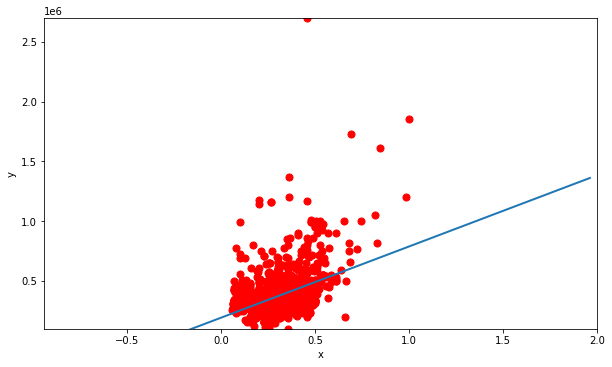

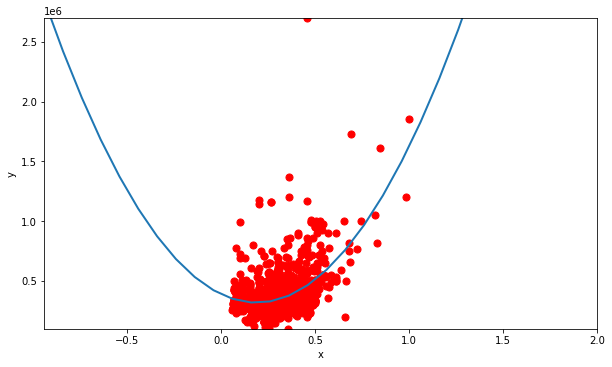

In [105]:
for n in range(1, 3):
    plot_and_mse(data_train, data_test, n) 

[[3.97959184e-01 4.76118000e+05]
 [3.16326531e-01 4.59531000e+05]
 [7.65306122e-02 4.11557000e+05]
 ...
 [3.31632653e-01 3.20000000e+05]
 [3.41836735e-01 3.64000000e+05]
 [2.55102041e-01 2.09000000e+05]]


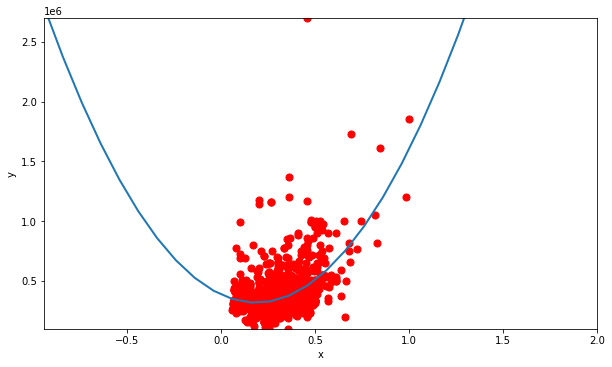

In [7]:
n = 2
x, y = get_poly_data(data, n)
print(data)
fig = plot_data(x, y, xlabel='x', ylabel='y')
plot_fun(fig, polynomial_regression(x, y, n), x)

In [8]:
# Ilość nauki do oceny

In [67]:
data_marks_all = pandas.read_csv('archive(1)/Student_Marks.csv')
data_marks_all

number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]

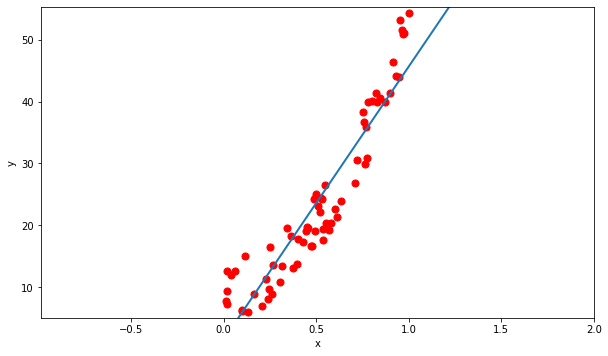

In [77]:
data_marks_all = data_marks_all[['time_study', 'Marks']]
data_marks_all = data_marks_all.sample(frac=1)
data_marks = data_marks_all[0:70]
data_marks_test = data_marks_all[70:]
data_marks = np.matrix(data_marks).astype(float)
n = 1 # Wielomian pierwszego stopnia

x, y = get_poly_data(np.array(data_marks), n)
fig = plot_data(x, y, xlabel='x', ylabel='y')
plot_fun(fig, polynomial_regression(x, y, n), x)

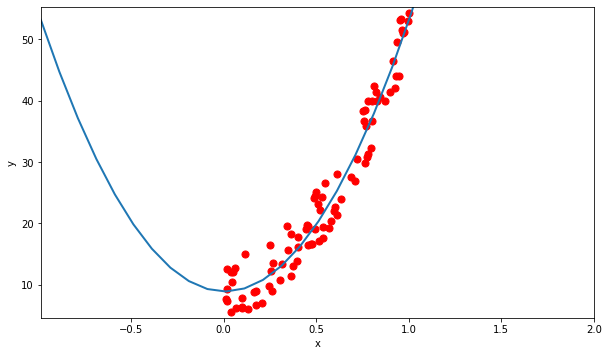

In [73]:
n = 2 # Wielomian drugiego stopnia

x, y = get_poly_data(np.array(data_marks), n)
fig = plot_data(x, y, xlabel='x', ylabel='y')
plot_fun(fig, polynomial_regression(x, y, n), x)

In [74]:


n = 2 # Wielomaian pierwszego stopnia
x, y = get_poly_data(np.array(data_marks), n)
model = polynomial_regression(x, y, n)

index = 2
print(data_marks[index].item(1))
print(x[index])
print([x[index].item(1)])
model([x[index].item(1)])


40.024
[[1.         0.80130703 0.64209295]]
[0.8013070252607767]


array([37.16059534])

Wielomian 1 stopnia, MSE = 465.8122515203192


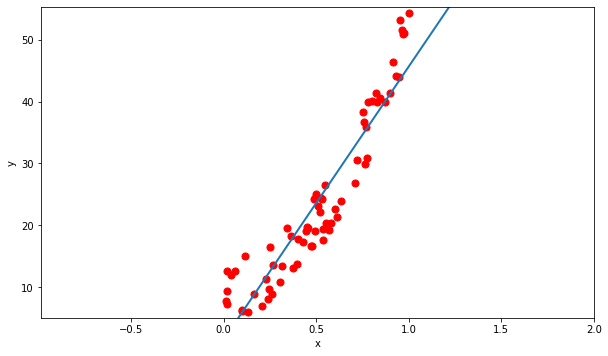

In [87]:


# data_marks_test
plot_and_mse(data_marks, data_marks_test, 1) 

In [13]:
!unzip archive.zip

Archive:  archive.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [14]:
data_ins = pandas.read_csv('insurance.csv')
data_ins = data_ins.sample(frac=1)
data_ins

age     sex     bmi  children smoker     region      charges
309    41  female  33.060         2     no  northwest   7749.15640
696    53  female  32.300         2     no  northeast  29186.48236
261    20  female  26.840         1    yes  southeast  17085.26760
937    39  female  24.225         5     no  northwest   8965.79575
891    36  female  29.040         4     no  southeast   7243.81360
...   ...     ...     ...       ...    ...        ...          ...
584    19    male  20.700         0     no  southwest   1242.81600
1066   48    male  37.290         2     no  southeast   8978.18510
1025   21  female  34.600         0     no  southwest   2020.17700
831    36  female  25.840         0     no  northwest   5266.36560
49     36    male  35.200         1    yes  southeast  38709.17600

[1338 rows x 7 columns]

In [15]:
data_ins = data_ins[['bmi', 'age']]
data_ins = np.matrix(data_ins).astype(float)
print(data_ins)


[[33.06 41.  ]
 [32.3  53.  ]
 [26.84 20.  ]
 ...
 [34.6  21.  ]
 [25.84 36.  ]
 [35.2  36.  ]]


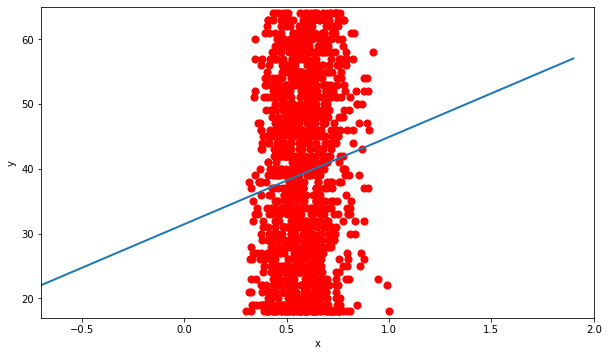

In [16]:
n = 1 # Wielomaian pierwszego stopnia

x, y = get_poly_data(np.array(data_ins), n)
fig = plot_data(x, y, xlabel='x', ylabel='y')
plot_fun(fig, polynomial_regression(x, y, n), x)

In [17]:
n = 1 # Wielomaian pierwszego stopnia

x, y = get_poly_data(np.array(data_ins), n)
model = polynomial_regression(x, y, n)

index = 10
print(data_ins.item(index), x.item(index))
a([x.item(index)])

29.735 1.0


NameError: name 'a' is not defined

In [ ]:
n = 2 # Wielomian 2 stopnia
x, y = get_poly_data(np.array(data_ins), n)
fig = plot_data(x, y, xlabel='x', ylabel='y')
plot_fun(fig, polynomial_regression(x, y, n), x)

In [ ]:
n = 3 # Wielomian 3 stopnia
x, y = get_poly_data(np.array(data_ins), n)
fig = plot_data(x, y, xlabel='x', ylabel='y')
plot_fun(fig, polynomial_regression(x, y, n), x)